
# AB Testing

## 1) Importing Libraries  and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [2]:
df_control_raw = pd.read_excel('ab_testing.xlsx', sheet_name='Control Group')
df_test_raw = pd.read_excel('ab_testing.xlsx', sheet_name='Test Group')

df_control_raw = df_control_raw[["Impression","Click","Purchase","Earning"]]
df_test_raw = df_test_raw[["Impression","Click","Purchase","Earning"]]

## 2) Data Preprocessing and EDA

In [3]:
df_control_raw["Click_Rate"] = df_control_raw["Click"] / df_control_raw["Impression"]
df_control_raw["Purchase_to_Click"] = df_control_raw["Purchase"] / df_control_raw["Click"]
df_control_raw["Purchase_to_Impression"] = df_control_raw["Purchase"] / df_control_raw["Impression"]
df_control = df_control_raw.copy()
df_control.head()

,Impression,Click,Purchase,Earning,Click_Rate,Purchase_to_Click,Purchase_to_Impression
0,82529.459271,6090.077317,665.211255,2311.277143,0.073793,0.109229,0.008060
1,98050.451926,3382.861786,315.084895,1742.806855,0.034501,0.093142,0.003213
2,82696.023549,4167.965750,458.083738,1797.827447,0.050401,0.109906,0.005539
3,109914.400398,4910.882240,487.090773,1696.229178,0.044679,0.099186,0.004432
4,108457.762630,5987.655811,441.034050,1543.720179,0.055207,0.073657,0.004066


In [4]:
df_control.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.45,20302.16,45475.94,85726.69,99790.70,115212.82,147539.34
Click,40.0,5100.66,1329.99,2189.75,4124.30,5001.22,5923.80,7959.13
Purchase,40.0,550.89,134.11,267.03,470.10,531.21,637.96,801.80
Earning,40.0,1908.57,302.92,1253.99,1685.85,1975.16,2119.80,2497.30
Click_Rate,40.0,0.05,0.02,0.02,0.04,0.05,0.06,0.16
Purchase_to_Click,40.0,0.12,0.05,0.04,0.09,0.11,0.14,0.30
Purchase_to_Impression,40.0,0.01,0.00,0.00,0.00,0.01,0.01,0.01


In [5]:
df_test_raw["Click_Rate"] = df_test_raw["Click"] / df_test_raw["Impression"]
df_test_raw["Purchase_to_Click"] = df_test_raw["Purchase"] / df_test_raw["Click"]
df_test_raw["Purchase_to_Impression"] = df_test_raw["Purchase"] / df_test_raw["Impression"]
df_test = df_test_raw.copy()
df_test.head()

,Impression,Click,Purchase,Earning,Click_Rate,Purchase_to_Click,Purchase_to_Impression
0,120103.503796,3216.547958,702.160346,1939.611243,0.026781,0.218296,0.005846
1,134775.943363,3635.082422,834.054286,2929.405820,0.026971,0.229446,0.006188
2,107806.620788,3057.143560,422.934258,2526.244877,0.028358,0.138343,0.003923
3,116445.275526,4650.473911,429.033535,2281.428574,0.039937,0.092256,0.003684
4,145082.516838,5201.387724,749.860442,2781.697521,0.035851,0.144165,0.005169


In [6]:
df_test.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.41,18807.45,79033.83,112691.97,119291.30,132050.58,158605.92
Click,40.0,3967.55,923.10,1836.63,3376.82,3931.36,4660.50,6019.70
Purchase,40.0,582.11,161.15,311.63,444.63,551.36,699.86,889.91
Earning,40.0,2514.89,282.73,1939.61,2280.54,2544.67,2761.55,3171.49
Click_Rate,40.0,0.03,0.01,0.01,0.03,0.03,0.04,0.08
Purchase_to_Click,40.0,0.16,0.07,0.06,0.11,0.15,0.18,0.45
Purchase_to_Impression,40.0,0.00,0.00,0.00,0.00,0.00,0.01,0.01


In [7]:
# Histogram for the both bidding types

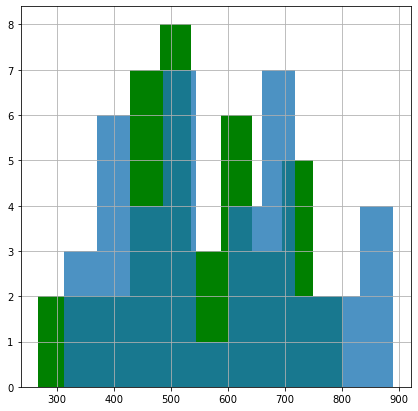

In [8]:
df_control['Purchase'].hist(figsize=(7,7), color='g');
df_test['Purchase'].hist(figsize=(7,7), alpha=0.8);

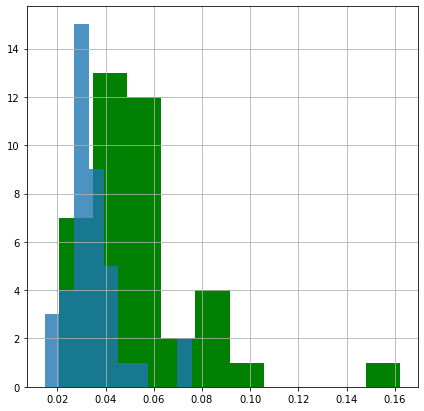

In [9]:
df_control['Click_Rate'].hist(figsize=(7,7), color='g');
df_test['Click_Rate'].hist(figsize=(7,7), alpha=0.8);

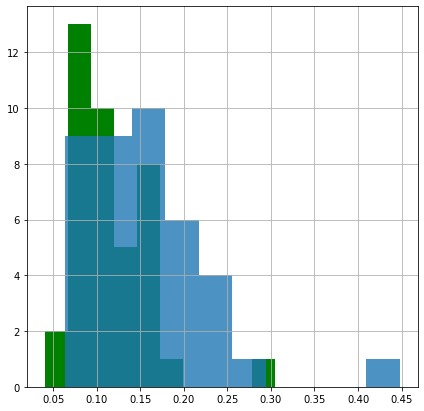

In [10]:
df_control['Purchase_to_Click'].hist(figsize=(7,7), color='g');
df_test['Purchase_to_Click'].hist(figsize=(7,7), alpha=0.8);

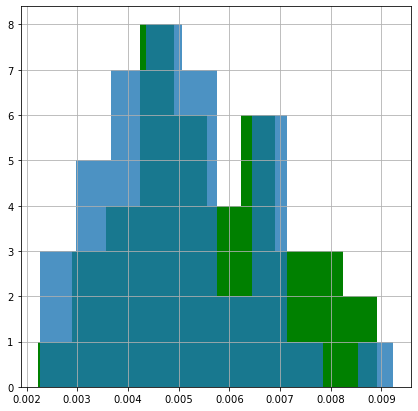

In [11]:
df_control['Purchase_to_Impression'].hist(figsize=(7,7), color='g');
df_test['Purchase_to_Impression'].hist(figsize=(7,7), alpha=0.8);

## 3) Build the Hypothesis

In [12]:
# H0: There is no meaningful difference between two bidding models.
# H1: There is a meaningful difference between two bidding models.

for i in df_test.columns:
    df_test = df_test_raw.copy()
    df_control = df_control_raw.copy()

    df_control = df_control[i]
    df_control = pd.DataFrame(df_control)
    df_control.rename({i : 'A'}, axis=1, inplace=True)

    df_test = df_test[i]
    df_test = pd.DataFrame(df_test)
    df_test.rename({i : 'B'}, axis=1, inplace=True)

    df = pd.concat([df_control, df_test], axis=1)
    
    test_stat1, pvalue1 = shapiro(df.A) # Normality check with Shapiro test
    test_stat2, pvalue2 = shapiro(df.B) # Normality check with Shapiro test
    test_stat3, pvalue3 = levene(df.A, df.B) # Variance homogeneity with Levene test
    test_stat4, pvalue4 = ttest_ind(df.A, df.B,equal_var=True)
    test_stat5, pvalue5 = mannwhitneyu(df.A, df.B)

    if pvalue1 < 0.05 and pvalue2 < 0.05:
        if pvalue4 < 0.05:
            print(i,'=> Reject H0; there is statistical evidence that both bidding models have significant difference.')
        else:
            print(i,'=> Cannot reject H0; there is no statistical evidence that both bidding models have significant difference.')
        
    elif pvalue1 >= 0.05 or pvalue2 >= 0.05:
        if pvalue5 < 0.05:
            print(i,'=> Reject H0; there is statistical evidence that both bidding models have significant difference.')
        else:
            print(i,'=> Cannot reject H0; there is no statistical evidence that both bidding models have significant difference.')
    else:
        print('No Result')
    print(" ")

Impression => Reject H0; there is statistical evidence that both bidding models have significant difference.
 
Click => Reject H0; there is statistical evidence that both bidding models have significant difference.
 
Purchase => Cannot reject H0; there is no statistical evidence that both bidding models have significant difference.
 
Earning => Reject H0; there is statistical evidence that both bidding models have significant difference.
 
Click_Rate => Reject H0; there is statistical evidence that both bidding models have significant difference.
 
Purchase_to_Click => Reject H0; there is statistical evidence that both bidding models have significant difference.
 
Purchase_to_Impression => Reject H0; there is statistical evidence that both bidding models have significant difference.
 


## 4) Comparison of Metrics

In [13]:
df_test = df_test_raw.copy()
df_control = df_control_raw.copy()

### i) Impression

In [14]:
print("Control Impression :", round(df_control.Impression.mean(),2))
print("Test Impression    :", round(df_test.Impression.mean(),2))
Impression_Comparison = round(((df_test.Impression.mean()-df_control.Impression.mean())/df_control.Impression.mean())*100)
print(f"Impression Comparison: %{Impression_Comparison}")

Control Impression : 101711.45
Test Impression    : 120512.41
Impression Comparison: %18


- Average Test Impression is %18 bigger than Average Control Impression. 
- If the impression is high, the click will also be high.
- Click-through rates may be low when impression is high. The reason for this is that as the impression increases, advertisements appear to people who are not included in the target audience.

### ii) Click

In [15]:
print("Control Click :", round(df_control.Click.mean(),2))
print("Test Click    :", round(df_test.Click.mean(),2))
Click_Comparison = round(((df_test.Click.mean()-df_control.Click.mean())/df_control.Click.mean())*100)
print(f"Click Comparison: %{Click_Comparison}")

Control Click : 5100.66
Test Click    : 3967.55
Click Comparison: %-22


- Although average test impression is higher than average control impression, average test click is %22 lower than average control click.

### iii) Purchase

In [16]:
print("Control Purchase :", round(df_control.Purchase.mean(),2))
print("Test Purchase    :", round(df_test.Purchase.mean(),2))
Purchase_Comparison = round(((df_test.Purchase.mean()-df_control.Purchase.mean())/df_control.Purchase.mean())*100)
print(f"Purchase Comparison: %{Purchase_Comparison}")

Control Purchase : 550.89
Test Purchase    : 582.11
Purchase Comparison: %6


- Average test purchase is %6 bigger than average Control Purchase.

### iv) Earning

In [17]:
print("Control Earning :", round(df_control.Earning.mean(),2))
print("Test Earning    :", round(df_test.Earning.mean(),2))
Earning_Comparison = round(((df_test.Earning.mean()-df_control.Earning.mean())/df_control.Earning.mean())*100)
print(f"Click Comparison: %{Earning_Comparison}")

Control Earning : 1908.57
Test Earning    : 2514.89
Click Comparison: %32


- Average Test Earning is %32 higher than average Control Earning.
- Although the Test bidding has fewer clicks than the control bidding, the test bidding resulted in higher earnings.

### v) Click Rate

In [18]:
print("Control Click Rate :", round(df_control.Click_Rate.mean(),4))
print("Test Click Rate    :", round(df_test.Click_Rate.mean(),4))
Click_Rate_Comparison = round(((df_test.Click_Rate.mean()-df_control.Click_Rate.mean())/df_control.Click_Rate.mean())*100)
print(f"Click Comparison: %{Click_Rate_Comparison}")

Control Click Rate : 0.0536
Test Click Rate    : 0.0342
Click Comparison: %-36


- Average Test Click Rate is %36 lower than average Control Click Rate.
- Part of the difference between the two biddings can be explained by the 18% greater test impression.

### vi) Purchase to Click

In [19]:
print("Control Purchase to Click :", round(df_control.Purchase_to_Click.mean(),4))
print("Test Purchase to Click    :", round(df_test.Purchase_to_Click.mean(),4))
Purchase_to_Click_Comparison = round(((df_test.Purchase_to_Click.mean()-df_control.Purchase_to_Click.mean())/df_control.Purchase_to_Click.mean())*100)
print(f"Click Comparison: %{Purchase_to_Click_Comparison}")

Control Purchase to Click : 0.1159
Test Purchase to Click    : 0.1566
Click Comparison: %35


- Average Test Purchase to Click is %35 higher than average Purchase to Click.

### vii) Purchase to Impression

In [20]:
print("Control Purchase to Impression Rate :", round(df_control.Purchase_to_Impression.mean(),4))
print("Test Purchase to Impression Rate    :", round(df_test.Purchase_to_Impression.mean(),4))
Purchase_to_Impression_Comparison = round(((df_test.Purchase_to_Impression.mean()-df_control.Purchase_to_Impression.mean())/df_control.Purchase_to_Impression.mean())*100)
print(f"Click Comparison: %{Purchase_to_Impression_Comparison}")

Control Purchase to Impression Rate : 0.0056
Test Purchase to Impression Rate    : 0.0049
Click Comparison: %-12


- Average Test Purchase to Impression is %12 lower than average Purchase to Impression.
- Part of the difference between the two biddings can be explained by the 18% greater test impression.

## Result

According to the results we obtained above, the bidding case should be examined by earning. After hypothesis testing, we found a statistically meaningful difference between the two bidding models. Therefore, we compared the averages of both bidding models, average test earning is higher than average control earning. So, we believe that the average bidding model works well.